In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# The mask() method replaces the values of the rows where the condition evaluates to True.
data=data.mask(data==' ')

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# convert TotalCharges column into float and fill missing value with mean.
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
corr=data.corr()

In [ ]:
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


In [ ]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

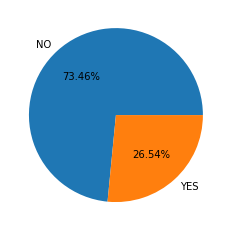

In [ ]:
plt.pie(data['Churn'].value_counts(),labels=['NO','YES'],autopct='%0.2f%%')
plt.show()

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

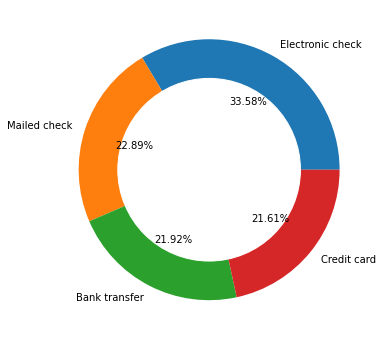

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(data['PaymentMethod'].value_counts(),labels=['Electronic check','Mailed check','Bank transfer','Credit card'],autopct='%0.2f%%')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
ds3=data.loc[(data['Churn']=='Yes') & (data['Contract']=='Month-to-month')]

In [ ]:
ds3.shape

(1655, 21)

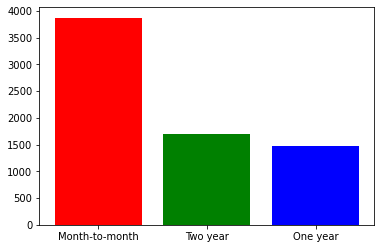

In [ ]:
plt.bar(data['Contract'].value_counts().keys(),data['Contract'].value_counts(),color=['R','G','BLUE'])
plt.show()

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

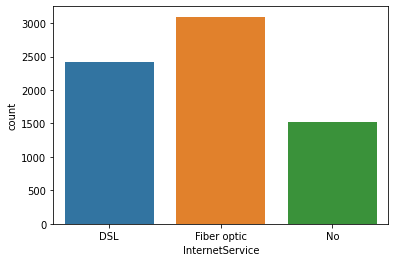

In [ ]:
sns.countplot('InternetService',data=data)
plt.show()

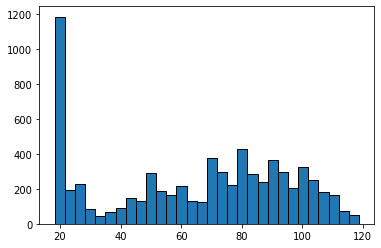

In [ ]:
plt.hist(data['MonthlyCharges'],bins=30,edgecolor='black')
plt.show()

In [ ]:
ds1=data.loc[(data['OnlineSecurity']=='No') & (data['Churn']=='Yes') & (data['SeniorCitizen']==0)]

In [ ]:
ds1.shape

(1054, 21)

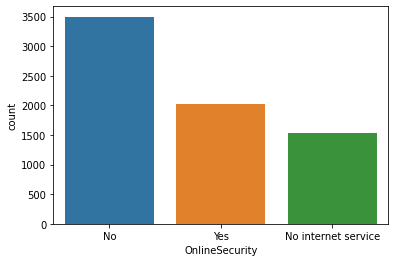

In [ ]:
sns.countplot('OnlineSecurity',data=data)
plt.show()


In [ ]:
ds2=data.loc[(data['Churn']=='Yes') & (data['SeniorCitizen']==0)]

In [ ]:
ds2.shape

(1393, 21)

In [ ]:
import matplotlib.image as img

In [ ]:
report=img.imread('/content/Screenshot (27).png')

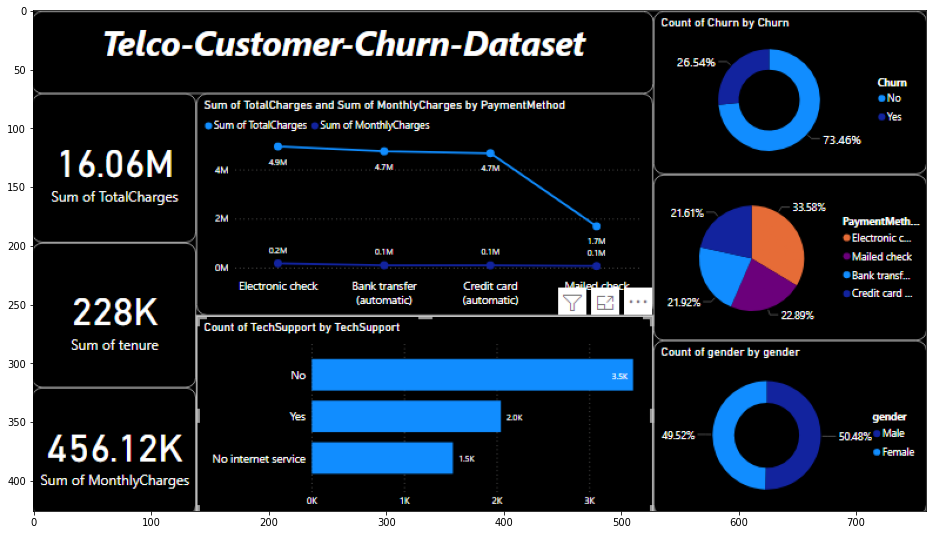

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(report)
plt.show()

# CONCLUSION

In [ ]:
# Most Churners leave beacuse mostly customers have month to month contract so they are free to go.

# Non senior citizens are high churners to leave company compare to senior citizen.

# The churners those who leaving that company dont have tech support and online security.


Model Creation

In [ ]:
# Try to build a machine learning model it helps in future to find out a customer leave the company or not.

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data=data.drop('customerID',axis=1)

In [ ]:
data.shape

(7043, 20)

In [ ]:
data.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
dict1={'No':0,'Yes':1,'No phone service':2}
dict2={'Fiber optic':0,'DSL':1,'No':2}
dict3={'Month-to-month':0,'Two year':1,'One year':2}
dict4={'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}

In [ ]:
data['MultipleLines']=data['MultipleLines'].map(dict1)
data['InternetService']=data['InternetService'].map(dict2)
data['Contract']=data['Contract'].map(dict3)
data['PaymentMethod']=data['PaymentMethod'].map(dict4)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,2,1,No,Yes,No,No,No,No,0,Yes,0,29.85,29.85,No
1,Male,0,No,No,34,Yes,0,1,Yes,No,Yes,No,No,No,2,No,1,56.95,1889.50,No
2,Male,0,No,No,2,Yes,0,1,Yes,Yes,No,No,No,No,0,Yes,1,53.85,108.15,Yes
3,Male,0,No,No,45,No,2,1,Yes,No,Yes,Yes,No,No,2,No,2,42.30,1840.75,No
4,Female,0,No,No,2,Yes,0,0,No,No,No,No,No,No,0,Yes,0,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in data.columns:
  if data[i].dtypes=='object':
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,2,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,2,0,2,0,0,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,2,0,2,2,0,0,2,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
X=data.drop('Churn',axis=1)

In [ ]:
X.shape

(7043, 19)

In [ ]:
y=data['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4930, 19)
(2113, 19)
(4930,)
(2113,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-1.00040576, -0.43584282, -0.97515638, ..., -0.26958189,
         0.2679385 , -0.72323288],
       [ 0.9995944 , -0.43584282,  1.02547655, ..., -1.13994124,
         0.59379741, -0.48657117],
       [-1.00040576, -0.43584282,  1.02547655, ..., -1.13994124,
        -0.56926825,  0.38383476],
       ...,
       [ 0.9995944 , -0.43584282,  1.02547655, ..., -0.26958189,
        -1.47498893, -0.48614983],
       [ 0.9995944 ,  2.29440511, -0.97515638, ..., -1.13994124,
         0.162661  , -0.98120567],
       [-1.00040576, -0.43584282, -0.97515638, ...,  1.4711368 ,
        -1.48668643, -0.97022858]])

In [ ]:
X_test

array([[-1.00040576, -0.43584282, -0.97515638, ..., -1.13994124,
        -0.22335648, -0.54855294],
       [ 0.9995944 , -0.43584282, -0.97515638, ...,  1.4711368 ,
         1.72845486,  2.11444567],
       [-1.00040576, -0.43584282, -0.97515638, ..., -1.13994124,
         0.23618814, -0.60239614],
       ...,
       [ 0.9995944 ,  2.29440511,  1.02547655, ..., -1.13994124,
         1.50620237,  2.37379337],
       [ 0.9995944 , -0.43584282,  1.02547655, ..., -0.26958189,
        -1.3479875 , -0.42179523],
       [ 0.9995944 ,  2.29440511,  1.02547655, ...,  0.60077746,
         0.55870491,  0.23647559]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1560
           1       0.65      0.54      0.59       553

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [ ]:
a1=[[0,0,1,0,1,0,2,1,0,2,0,0,0,0,0,1,0,29.85,29.85]]

In [ ]:
a12=sc.transform(a1)

In [ ]:
pred=model1.predict(a1)
if pred==0:
  print('Not_Churn')
else:
  print('Churn')

Churn
